In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
data_df=pd.read_csv(os.path.join('.','wine-data.csv'))
data_df.head(3)

,kind,alcohol,malic acid,ash,alkalinity,magnesium,phenols,flavonoids,nf phenols,pas,color,fue,od2380/315,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185


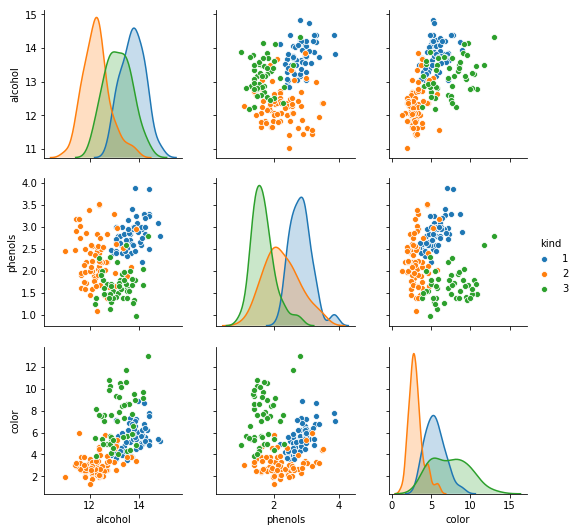

In [3]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

# Create pairplot
sns.pairplot(
    data_df,
    # Variables on the x-axes
    x_vars=['alcohol', 'phenols', 'color'],
    # Variables on the y-axes
    y_vars=['alcohol', 'phenols', 'color'],
    # Use a different color for each kind of wine
    hue='kind'
)
plt.show()

In [4]:
# Create X/y arrays

features=data_df.drop('kind', axis=1)
X=features.values
y=data_df['kind'].values

print('X:', X.shape)
print('y:', y.shape)

X: (178, 13)
y: (178,)


In [5]:
# Compute PCSA estimator
from sklearn.decomposition import PCA

# Create PCA transformer
pca = PCA(n_components=2)

# Apply PCA
pca.fit(X, y=None); # Unsupervised learning, no y variable

In [6]:
X_2d=pca.transform(X)

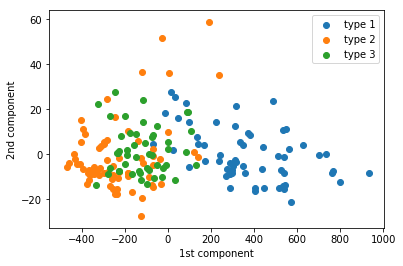

In [7]:
# plot the reduced dataset

for kind in [1, 2, 3]:
    
    # get index
    idx=(y==kind)

    plt.scatter(X_2d[idx,0], X_2d[idx,1], label="type {}".format(kind))
    
plt.legend()
plt.xlabel('1st component')
plt.ylabel('2nd component')
plt.show()

In [8]:
pca.components_


array([[ 1.65926472e-03, -6.81015556e-04,  1.94905742e-04,
        -4.67130058e-03,  1.78680075e-02,  9.89829680e-04,
         1.56728830e-03, -1.23086662e-04,  6.00607792e-04,
         2.32714318e-03,  1.71408087e-04,  7.04931645e-04,
         9.99822937e-01],
       [ 1.20340622e-03,  2.15498179e-03,  4.59369256e-03,
         2.64503928e-02,  9.99344186e-01,  8.77962322e-04,
        -5.18505265e-05, -1.35447893e-03,  5.00440045e-03,
         1.51003527e-02, -7.62534250e-04, -3.49536416e-03,
        -1.77738095e-02]])

In [9]:
results_df=pd.DataFrame({
    'variance': X.var(axis=0),
    '1st component': pca.components_[0],
    '2nd component': pca.components_[1]
}).set_index(features.columns)

results_df.sort_values('variance', ascending=False)

,variance,1st component,2nd component
proline,98609.600966,0.999823,-0.017774
magnesium,202.843328,0.017868,0.999344
alkalinity,11.090031,-0.004671,0.026450
color,5.344256,0.002327,0.015100
malic acid,1.241004,-0.000681,0.002155
flavonoids,0.992114,0.001567,-0.000052
alcohol,0.655360,0.001659,0.001203
od2380/315,0.501254,0.000705,-0.003495
phenols,0.389489,0.000990,0.000878
pas,0.325754,0.000601,0.005004


In [10]:
X.var(axis=0)

array([6.55359730e-01, 1.24100408e+00, 7.48418003e-02, 1.10900306e+01,
       2.02843328e+02, 3.89489032e-01, 9.92113512e-01, 1.54016191e-02,
       3.25754248e-01, 5.34425590e+00, 5.19492267e-02, 5.01254463e-01,
       9.86096010e+04])

In [13]:
data_df.columns

Index(['kind', 'alcohol', 'malic acid', 'ash', 'alkalinity', 'magnesium',
       'phenols', 'flavonoids', 'nf phenols', 'pas', 'color', 'fue',
       'od2380/315', 'proline'],
      dtype='object')

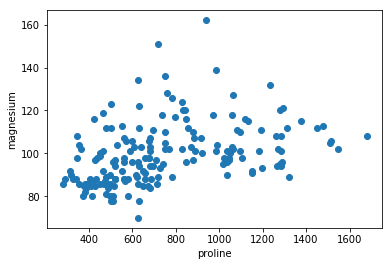

In [15]:
# Plot proline and magnesium variables
plt.scatter(
    X[:, 12], # Proline attribute
    X[:, 4] # Magnesium attribute
)
plt.xlabel('proline')
plt.ylabel('magnesium')
plt.show()

In [16]:
from sklearn.preprocessing import StandardScaler

# Create Standard scaler
scaler = StandardScaler()

# Rescale data
X_rescaled = scaler.fit_transform(X)

# Create PCA transformer
pca2 = PCA(n_components=2)

# Apply PCA to rescaled data
X_2d_rescaled = pca2.fit_transform(X_rescaled)

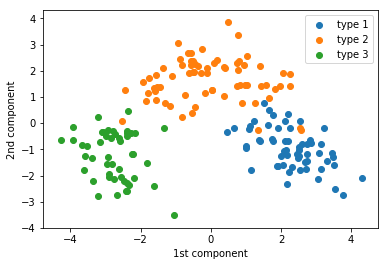

In [17]:
# Plot each kind of wine
fig = plt.figure()
for kind in [1, 2, 3]:
    # Wine samples of this type
    idx = (y == kind)

    # Plot their components
    plt.scatter(
        X_2d_rescaled[idx, 0], X_2d_rescaled[idx, 1],
        label='type {}'.format(kind)
    )

# Labels and legend
plt.legend()
plt.xlabel('1st component')
plt.ylabel('2nd component')
plt.show()

In [18]:
# Create DataFrame with variance and principal components
results_df2 = pd.DataFrame({
    'variance': X_rescaled.var(axis=0),
    '1st component': pca2.components_[0],
    '2nd component': pca2.components_[1]
}).set_index(features.columns)

# Sort DataFrame by the coefficients of the 1st loading vector
results_df2.sort_values('1st component', ascending=False)

,variance,1st component,2nd component
flavonoids,1.0,0.422935,0.003347
phenols,1.0,0.394655,-0.065063
od2380/315,1.0,0.376167,0.164478
pas,1.0,0.313434,-0.039307
fue,1.0,0.296690,0.279282
proline,1.0,0.286760,-0.364883
alcohol,1.0,0.144326,-0.483648
magnesium,1.0,0.141997,-0.299617
ash,1.0,-0.002056,-0.316068
color,1.0,-0.088623,-0.529996


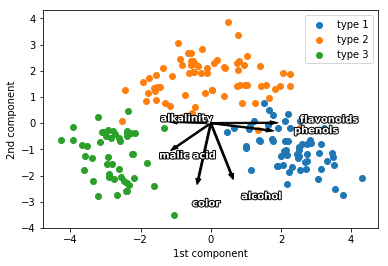

In [23]:
import matplotlib.patheffects as path_effects

# Plot each kind of wine
for kind in [1, 2, 3]:
    # Wine samples of this type
    idx = (y == kind)

    # Plot their components
    plt.scatter(
        X_2d_rescaled[idx, 0], X_2d_rescaled[idx, 1],
        label='type {}'.format(kind)
    )

# Plot a few features using the weights in the loading vectors
for feature in ['flavonoids', 'phenols', 'malic acid',
                'alkalinity', 'alcohol', 'color']:
    # Get weights
    weight1 = results_df2.loc[feature, '1st component']*4 # rescale them
    weight2 = results_df2.loc[feature, '2nd component']*4 # (4 is arbitrary)

    # Plot arrows
    plt.arrow(
        0, 0, # Vector starts at (x,y)=(0,0)
        weight1, weight2, # ends at (x,y)=(weight1, weight2)
        color='black', width=0.05)

    # Add text
    text = plt.text(
        weight1 * 1.5, # x location (1.5 is arbitrary)
        weight2 * 1.5, # y location
        feature, # Feature name
        weight='bold', color='white')

    # Make the text stand out
    text.set_path_effects([
        path_effects.Stroke(linewidth=2, foreground='black'),
        path_effects.Normal()])

# Labels and legend
plt.legend()
plt.xlabel('1st component')
plt.ylabel('2nd component')
plt.show()

In [24]:
# Get explained variance
pca2.explained_variance_ratio_
# Returns: array([ 0.36198848,  0.1920749 ])

array([0.36198278, 0.1920793 ])

In [25]:
# Create PCA transformer
pca3 = PCA(n_components=None)

# Apply PCA to rescaled data
pca3.fit(X_rescaled)

# Proportion of variance explained
pve = pca3.explained_variance_ratio_
pve

array([0.36198278, 0.1920793 , 0.11123553, 0.07069848, 0.06563048,
       0.04935783, 0.04238743, 0.0268125 , 0.02222013, 0.01929513,
       0.01736819, 0.01298058, 0.00795163])

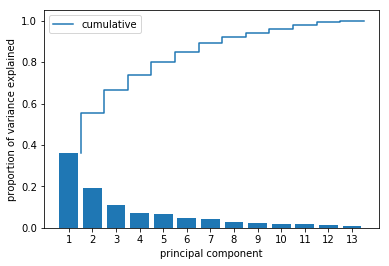

In [26]:
import numpy as np

# Create bar plot
xcor = np.arange(1, len(pve) + 1) # 1,2,..,n_components
plt.bar(xcor, pve)
plt.xticks(xcor)

# Add cumulative sum
pve_cumsum = np.cumsum(pve)
plt.step(
    xcor+0.5, # 1.5,2.5,..,n_components+0.5
    pve_cumsum, # Cumulative sum
    label='cumulative'
)

# Add labels
plt.xlabel('principal component')
plt.ylabel('proportion of variance explained')
plt.legend()
plt.show()